# SC1015 Data Science Project - Ryan Yu & Vaishob 
---

# Introduction to topic

Terrorism is defined as political violence in an asymmetrical conflict that is designed to induce terror and psychic fear (sometimes indiscriminate) through the violent victimization and destruction of noncombatant targets (sometimes iconic symbols).

The Global Terrorism Database (GTD)™ is the most comprehensive unclassified database of terrorist attacks in the world. It is an open-source database, which provides information on domestic and international terrorist attacks around the world since 1970, and now includes more than 200,000 events. For each event, a wide range of information is available, including the date and location of the incident, the weapons used, nature of the target, the number of casualties, and – when identifiable – the group or individual responsible.

## Practical Motivation

 ---
In the past, many terror attacks have been tipped off by intelligence agencies to the government. But the government, for varying reasons, have disregarded such calls (resulting in loss of many lives in some cases). By building a model that can accurately predict the success of future terror attacks, we can help respective governments to delegate resources more wisely and, more importantly, save more lives.


## Data Preparation & Cleaning

 ---
### Import Libraries

In [5]:
# Basic Libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib.patches as mpatches 
import matplotlib.font_manager as font_manager
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn import datasets
from sklearn import tree
import plotly.express as px
import folium
from folium.plugins import HeatMapWithTime

from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

### Import dataset

In [6]:
# read file using .read_excel
df = pd.read_excel("globalterrorismdb_0221dist.xlsx")
df 

eventid  iyear  imonth  iday         approxdate  extended  \
0       197000000001   1970       7     2                NaN         0   
1       197000000002   1970       0     0                NaN         0   
2       197001000001   1970       1     0                NaN         0   
3       197001000002   1970       1     0                NaN         0   
4       197001000003   1970       1     0                NaN         0   
...              ...    ...     ...   ...                ...       ...   
201178  201912310028   2019      12    31  December 31, 2019         0   
201179  201912310030   2019      12    31                NaN         0   
201180  201912310031   2019      12    31  December 31, 2019         0   
201181  201912310032   2019      12    31                NaN         0   
201182  201912310033   2019      12    31                NaN         0   

       resolution  country         country_txt  region  ... addnotes  \
0             NaT       58  Dominican Republic       2  ...      NaN   
1             NaT      130              Mexico       1  ...      NaN   
2             NaT      160         Philippines       5  ...      NaN   
3             NaT       78              Greece       8  ...      NaN   
4             NaT      101               Japan       4  ...      NaN   
...           ...      ...                 ...     ...  ...      ...   
201178        NaT       95                Iraq      10  ...      NaN   
201179        NaT      195               Sudan      11  ...      NaN   
201180        NaT      195               Sudan      11  ...      NaN   
201181        NaT       92               India       6  ...      NaN   
201182        NaT       44               China       4  ...      NaN   

                                                   scite1  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
201178  "Iraq: ISHM 235: December 20, 2019 - January 2...   
201179  "World: Protection in Danger Monthly News Brie...   
201180  "World: Protection in Danger Monthly News Brie...   
201181  "Civilian injured in landmine blast in Indian-...   
201182  "Hong Kong restaurant firebombed by black-clad...   

                                                   scite2  scite3  \
0                                                     NaN     NaN   
1                                                     NaN     NaN   
2                                                     NaN     NaN   
3                                                     NaN     NaN   
4                                                     NaN     NaN   
...                                                   ...     ...   
201178                                                NaN     NaN   
201179                                                NaN     NaN   
201180                                                NaN     NaN   
201181                                                NaN     NaN   
201182  "Hong Kong restaurant firebombed by black-clad...     NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0                           PGIS        0         0        0       0      NaN  
1                           PGIS        0         1        1       1      NaN  
2                           PGIS       -9        -9        1       1      NaN  
3                           PGIS       -9        -9        1       1      NaN  
4                           PGIS       -9        -9        1       1      NaN  
...                          ...      ...       ...      ...     ...      ...  
201178  START Primary Collection       -9        -9        0      -9      NaN  
201179  START Primary Collection       -9        -9      

### Exploring dataset

In [7]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    189429
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       172269
Length: 135, dtype: int64

## Data cleaning 

In [8]:
#Features that we require for prediction, this will be used for our RandomForestClassifier model
feature= [      'iyear', #Iyear is the year the event occurred.
                'extended', #extended means is the event lasted for more than 24 hours
                'vicinity', #is the attack in the vicinity of city?
                'doubtterr',#any doubts that it is a terrorist aattack?
                'multiple', # is the event linked to other attacks?
                'suicide', # is this a suicide attack?
                'claimed', #has any terrorist group claimed the attack
                'property',#any property damage?
                'ishostkid',#any hostages or kidnappings?
                'country',#country
                'region',#region 
                'attacktype1',# method of attack used
                'targtype1',#type of target
                'weaptype1',#weapon used
                'longitude',
                 'latitude'
]

##### Label encoding to map each categorical data to a numeric value

In [9]:
#Data cleaning
cntry = dict(zip(df.country,df.country_txt))
weapx = dict(zip(df.weaptype1,df.weaptype1_txt))
atk = dict(zip(df.attacktype1,df.attacktype1_txt))
targ = dict(zip(df.targtype1,df.targtype1_txt))
print("Country \n",cntry)
print("\n Weapon type \n",weapx)
print("\n Attack type \n",atk)
print("\n Target type \n",targ)

Country 
 {58: 'Dominican Republic', 130: 'Mexico', 160: 'Philippines', 78: 'Greece', 101: 'Japan', 217: 'United States', 218: 'Uruguay', 98: 'Italy', 499: 'East Germany (GDR)', 65: 'Ethiopia', 83: 'Guatemala', 222: 'Venezuela', 362: 'West Germany (FRG)', 199: 'Switzerland', 102: 'Jordan', 185: 'Spain', 30: 'Brazil', 60: 'Egypt', 11: 'Argentina', 110: 'Lebanon', 96: 'Ireland', 209: 'Turkey', 158: 'Paraguay', 94: 'Iran', 603: 'United Kingdom', 45: 'Colombia', 26: 'Bolivia', 145: 'Nicaragua', 142: 'Netherlands', 21: 'Belgium', 38: 'Canada', 14: 'Australia', 153: 'Pakistan', 230: 'Zambia', 198: 'Sweden', 49: 'Costa Rica', 406: 'South Yemen', 36: 'Cambodia', 97: 'Israel', 161: 'Poland', 201: 'Taiwan', 156: 'Panama', 106: 'Kuwait', 155: 'West Bank and Gaza Strip', 15: 'Austria', 236: 'Czechoslovakia', 92: 'India', 69: 'France', 428: 'South Vietnam', 31: 'Brunei', 604: 'Zaire', 605: "People's Republic of the Congo", 162: 'Portugal', 6: 'Algeria', 61: 'El Salvador', 205: 'Thailand', 87: 'Hait

#### Isolate and clean the required data by dropping all null values to obtain a dataframe, `frame`

In [10]:
feat= [      'iyear', #Iyear is the year the event occurred.
                'imonth',
                'extended', #extended means is the event lasted for more than 24 hours
                'vicinity', #is the attack in the vicinity of city?
                'doubtterr',#any doubts that it is a terrorist aattack?
                'multiple', # is the event linked to other attacks?
                'suicide', # is this a suicide attack?
                'claimed', #has any terrorist group claimed the attack
                'property',#any property damage?
                'ishostkid',#any hostages or kidnappings?
                'country',#country
                'region',#region 
                'attacktype1',# method of attack used
                'targtype1',#type of target
                'weaptype1',#weapon used
                'longitude',
                 'latitude',
       'success'
]
frame=df[feat]
#dropping all columns with NaN values
frame = frame.dropna()
frame

iyear  imonth  extended  vicinity  doubtterr  multiple  suicide  \
5        1970       1         0         0          0         0        0   
7        1970       1         0         0          1         0        0   
8        1970       1         0         0          0         0        0   
9        1970       1         0         0          0         0        0   
11       1970       1         0         0          1         0        0   
...       ...     ...       ...       ...        ...       ...      ...   
201178   2019      12         0         0          0         0        0   
201179   2019      12         0         0          0         0        0   
201180   2019      12         0         0          0         0        0   
201181   2019      12         0         0          0         0        0   
201182   2019      12         0         0          0         0        0   

        claimed  property  ishostkid  country  region  attacktype1  targtype1  \
5           0.0         1        0.0      217       1            2          3   
7           0.0         1        0.0      217       1            3         21   
8           1.0         1        0.0      217       1            7          4   
9           0.0         1        0.0      217       1            7          2   
11          0.0         1        0.0      217       1            7          4   
...         ...       ...        ...      ...     ...          ...        ...   
201178      0.0         1        0.0       95      10            3         14   
201179      0.0         1        0.0      195      11            9          3   
201180      0.0         1        0.0      195      11            2          2   
201181      0.0         0        0.0       92       6            3         14   
201182      0.0         1        0.0       44       4            7          2   

        weaptype1   longitude   latitude  success  
5               5  -89.176269  37.005105        1  
7               6 -122.225906  37.791927        1  
8               8  -89.412488  43.076592        1  
9               8  -89.386694  43.072950        1  
11              8 -104.876305  39.758968        1  
...           ...         ...        ...      ...  
201178          6   44.371771  33.303567        1  
201179         13   22.441728  13.440886        1  
201180          5   22.441728  13.440886        1  
201181          6   74.097730  33.812790        1  
201182          8  114.138494  22.340073        1  

[133890 rows x 18 columns]

## Exploratory Data Analysis & Data Visualisation

 ---

##### Initially we use the original dataframe, `df`. Subsequently we will use the `frame` dataframe that was created

**Uni-variate Visualization**

Identify patterns occuring in the dataset using univariate visualization

**What proportion of past terrorist attacks was successful?**

Text(0.5, 1.0, 'Successful & Failed Operations')

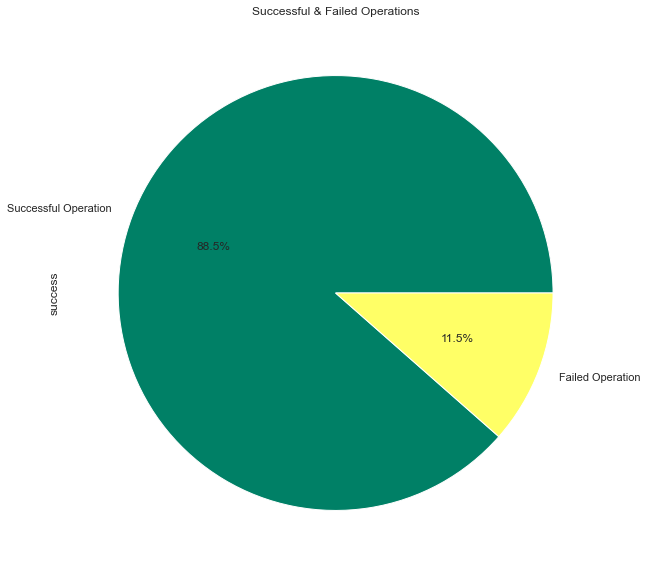

In [11]:
df_copy = df.copy()
df_copy["success"] = df["success"].replace({1:"Successful Operation", 0:"Failed Operation"})
df_copy["success"].value_counts().plot(kind="pie", figsize=(20,10), autopct="%1.1f%%", cmap="summer")
plt.title("Successful & Failed Operations")

**What is the trend of number of terrorist attacks over the years?**

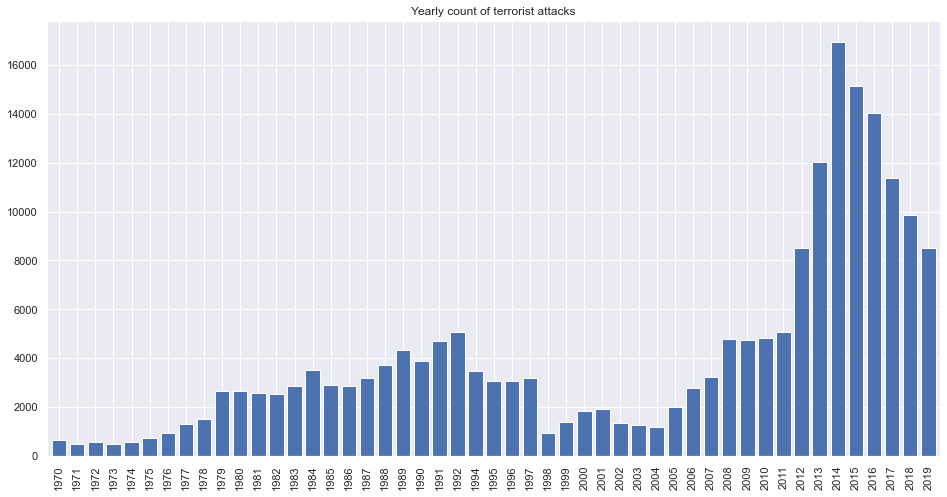

In [12]:
barplot = pd.value_counts(df['iyear'])\
.sort_index()\
.plot\
.bar(width=0.8, figsize=(16, 8), align='center', title="Yearly count of terrorist attacks")

**What is the trend of terrorist activities by region?**

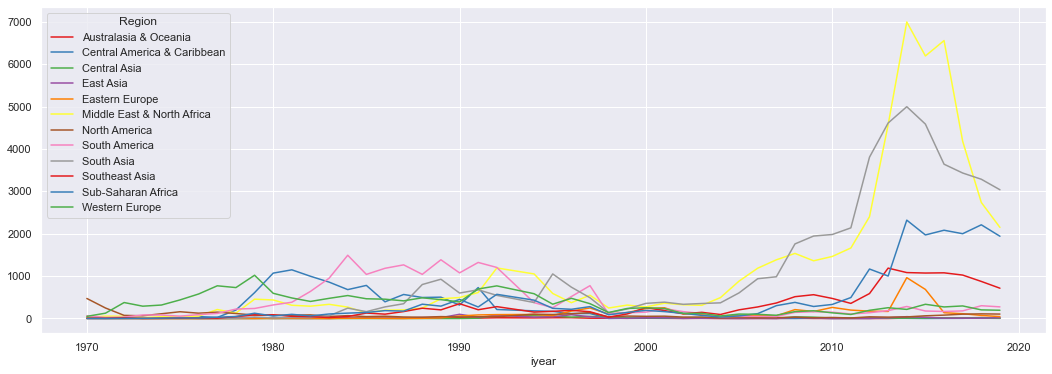

In [13]:
terror_region = df['region_txt']
terror_region.rename("Region",
          inplace=True)
terror_region=pd.crosstab(df['iyear'],terror_region)
terror_region.plot(color=sb.color_palette('Set1',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()


**Here we note a distinct spike in the number of attacks in 2012-2014 period. This is reflected across all major regions, namely Middle East, North Africa, Sub-Saharan Africa, South Asia, Australasia & Oceania and Eastern Europe.**

**Which Terrorist Group has carried out the largest number of attacks?**

In [14]:
group_name=df_copy["gname"]
group_name.dropna()
# Terrorist groups in the Dataset
print("Number of Terrorist groups : \t\t\t\t\t\t\t    ", len(group_name.unique()))

# Number of attacks per terrorist groups 
print(group_name.value_counts())
#sb.catplot(y = "gname", data = df_copy['gname'], kind = "count")

Number of Terrorist groups : 							     3671
Unknown                                                                             89231
Taliban                                                                             10094
Islamic State of Iraq and the Levant (ISIL)                                          6864
Shining Path (SL)                                                                    4563
Al-Shabaab                                                                           4126
                                                                                    ...  
French National                                                                         1
Communist Trade Union Workers                                                           1
Rebels backing deposed Pres. Zviad Gamsakhurdia                                         1
Local Residents                                                                         1
Popular Nationalist Insurgency Command of the Large Br

While there is a vast number of terrorist groups out there, it is interesting to note the proportion of attacks without a designated perpetrator (89231 in total). This shows how sparse information is in an area that concerns national security

In [15]:
# Drop all Unknown entries (Invalid Terrorist Group name)
gname = group_name.copy()
gname.replace('Unknown', np.nan, inplace=True)
gname.dropna()

print(gname.value_counts())

#df['gname'].value_counts()


Taliban                                                                             10094
Islamic State of Iraq and the Levant (ISIL)                                          6864
Shining Path (SL)                                                                    4563
Al-Shabaab                                                                           4126
Farabundo Marti National Liberation Front (FMLN)                                     3351
                                                                                    ...  
French National                                                                         1
Communist Trade Union Workers                                                           1
Rebels backing deposed Pres. Zviad Gamsakhurdia                                         1
Local Residents                                                                         1
Popular Nationalist Insurgency Command of the Large Brazilian Integralist Family        1
Name: gnam

**Distribution of the top 5 terrorist groups in terms of quanitity of attacks**

[0.34809297192909855, 0.2367059797227395, 0.15735567970204842, 0.14228567487412924, 0.11555969377198427]


<Figure size 432x288 with 0 Axes>

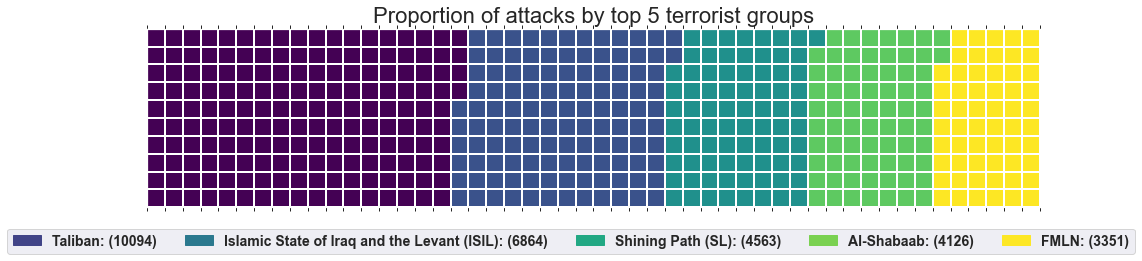

In [16]:
data = {
    'Group Name': ['Taliban', 'Islamic State of Iraq and the Levant (ISIL)', 'Shining Path (SL)', 'Al-Shabaab', 'FMLN'],
    'Values': [10094, 6864, 4563, 4126, 3351]
}

group_prop = pd.DataFrame(data)
group_prop.reset_index(drop=True, inplace=True)

Groups = group_prop['Group Name']
Values = group_prop['Values']

# compute the proportion of each group with respect to the total
total_values = 10094 + 6864 + 4563 + 4126 + 3351
category_proportions = [(float(Value) / total_values) for Value in Values]

print(category_proportions)

width = 50    # width of chart 
height = 10    # height of chart

total_num_tiles = width * height # total number of tiles

tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index +=1
        
        # if the number of tiles populated for the current category is equal to its allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ... proceed to the next category
            category_index += 1
        
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

# instantiate figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.viridis
plt.matshow(waffle_chart, cmap=colormap)
#plt.colorbar()

# get the axis 
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
ax.set_title('Proportion of attacks by top 5 terrorist groups', fontdict={'fontsize': 22, 'fontweight': 'medium'})

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between char and legend
values_cumsum = np.cumsum(data['Values'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend 
legend_handles = []
#for i, category in enumerate(data['Group Name']):
 #   label_str = category + ' (' + str(data['Values'][i]) + ') '
  #  color_val = colormap(int(i+1))/len(Groups)
   # legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

for indx, company_name in enumerate(Groups):
    label_text = '{1}: ({0})'.format(Values[indx], company_name)
    color_value = colormap(int(indx+1)/len(data['Group Name']))
    legend_handles.append(mpatches.Patch(color=color_value, label=label_text))

font = font_manager.FontProperties(
    family='Arial',
    weight='bold',
    style='normal',
    size=14,
)

# add legend to chart
plt.legend(handles=legend_handles,
          loc='lower center', 
          ncol=len(Groups),
          prop=font, 
          bbox_to_anchor=(0., -0.3, 0.95, .1)
          )

In [17]:
#Drop cells with predicted_terrorism 0
#clean=df.drop(newdf[newdf.Predicted_Terrorism ==0].index)
a=df["country_txt"].value_counts()
adf= pd.DataFrame(a)
#Reset so the index will now be a column
adf.reset_index(inplace=True)
#Now rename the columns
adf=adf.rename(columns={'index':'country','country_txt':'count'})
print(adf.head(n=10).to_string(index=False))

       country  count
          Iraq  26755
   Afghanistan  16313
      Pakistan  15208
         India  13477
      Colombia   8742
   Philippines   7976
          Peru   6109
         Yemen   5526
United Kingdom   5424
   El Salvador   5320


**Where do these attacks occur?**

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


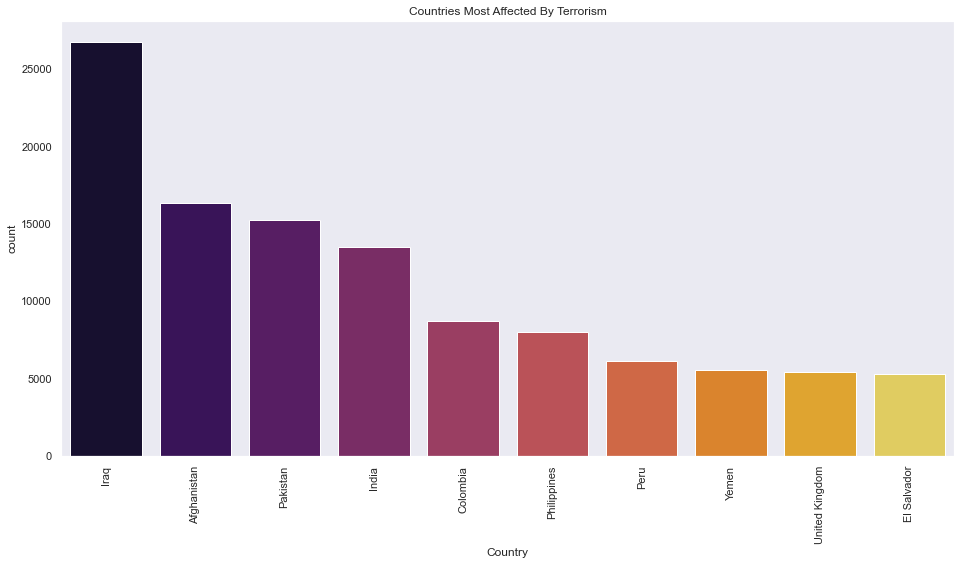

In [18]:
plt.subplots(figsize=(16,8))
sb.countplot('country_txt',data=df,palette='inferno',order=df["country_txt"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Countries Most Affected By Terrorism')
plt.xlabel("Country")
plt.grid(axis="y")
plt.show()

###### It appears that Middle East, South Asia are the biggest hotspots for terror attacks. They are followed by South American nations, Philippines as well as United Kingdom

**Which Types of Attacks are Common?**

Text(0.5, 1.0, 'Most Common Attack Methods')

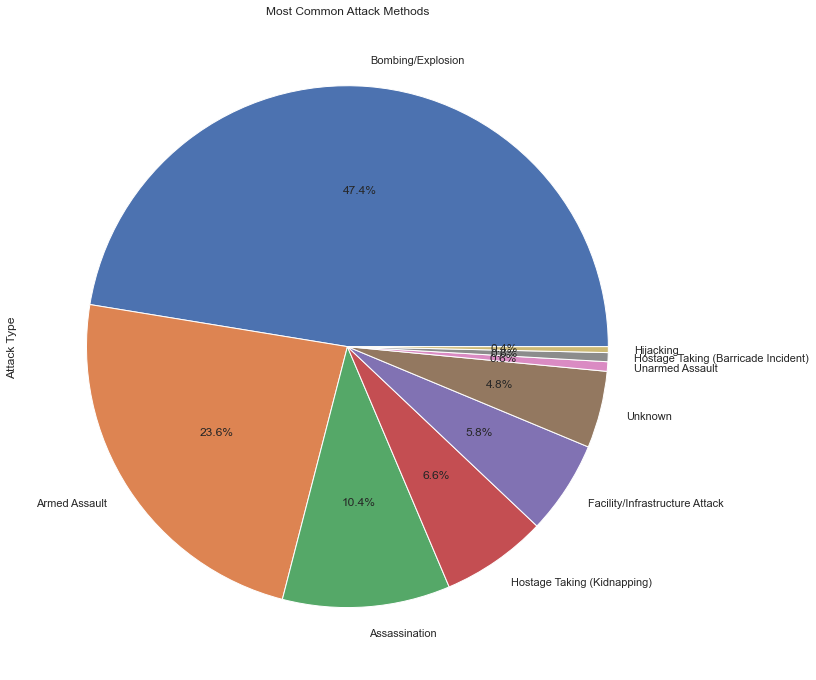

In [19]:
attack_df = df['attacktype1_txt']
attack_df.rename("Attack Type",
          inplace=True)
attack_df.value_counts().plot(kind='pie',figsize=[16,12],autopct='%1.1f%%')
plt.title("Most Common Attack Methods")

###### Bombing/Explosion comes out on top, comprising almost half of all terrorist attacks. It is followed by Armed Assault, with 23.6% of attacks. 

**Popular targets of terrorists?**

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


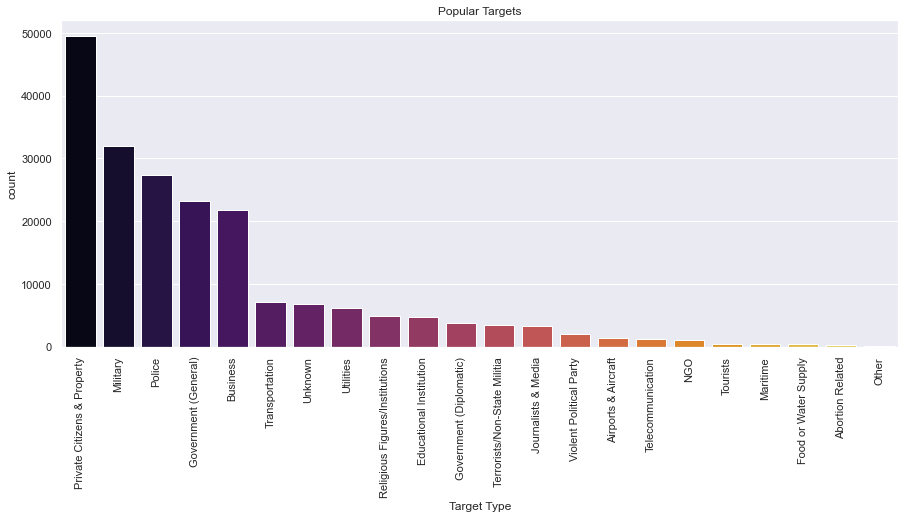

In [20]:
targ_df = df['targtype1_txt']
targ_df.rename("Target Type",
          inplace=True)
plt.subplots(figsize=(15,6))
sb.countplot(targ_df,palette='inferno',order=targ_df.value_counts().index)
plt.xticks(rotation=90)
plt.title('Popular Targets')
plt.show()


##### Private citizens and property seem to be most commonly targeted by terrorist groups. This is followed by the Military, Police, Government and Businesses


**Common Types of Attacks by Region?**

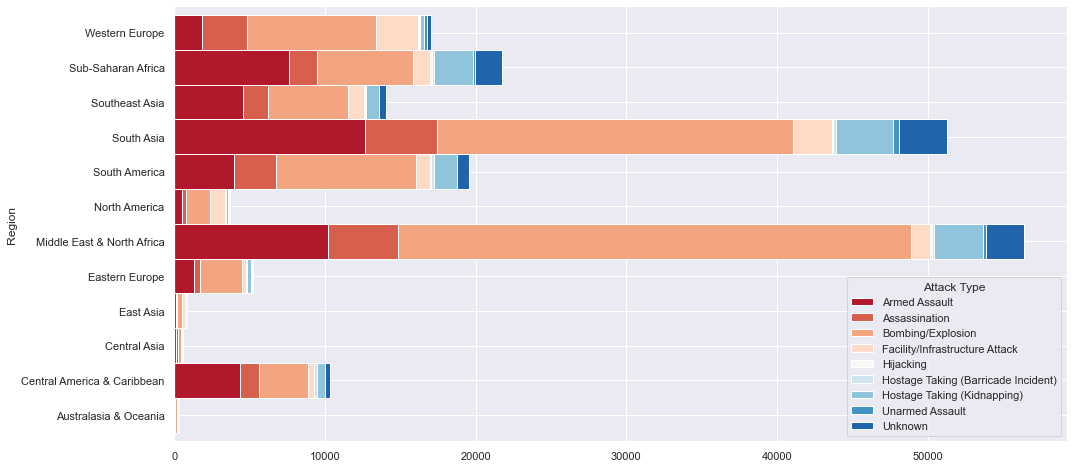

In [21]:
pd.crosstab(df.region_txt,df.attacktype1_txt).plot.barh(stacked=True,width=1,color=sb.color_palette('RdBu',9))
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.ylabel("Region")
plt.show()

In most countries, we see that **bombing/explosion** is the most commonly-used attacking means. It is worth noting that for regions of **Sub-Saharan Africa**, as well as the **Central Americas & Caribbean**, **armed assault** is more prevalent than bombing.

## Analytic Visualization
---
### In order to find patterns, we need to find better visualization techniques...

##### Is there a way to incorporate past-year attacks on the world map? 


In [22]:
coords = frame[['latitude','longitude','success']]
coords


latitude   longitude  success
5       37.005105  -89.176269        1
7       37.791927 -122.225906        1
8       43.076592  -89.412488        1
9       43.072950  -89.386694        1
11      39.758968 -104.876305        1
...           ...         ...      ...
201178  33.303567   44.371771        1
201179  13.440886   22.441728        1
201180  13.440886   22.441728        1
201181  33.812790   74.097730        1
201182  22.340073  114.138494        1

[133890 rows x 3 columns]

In [23]:
from collections import defaultdict, OrderedDict
data=defaultdict(list)
for x in frame.itertuples():
    if (x.success): #add only if it is successful
        data[x.iyear].append([x.latitude,x.longitude])

data = OrderedDict(sorted(data.items(), key=lambda t: t[0]))
print(data)
    

OrderedDict([(1970, [[37.005105, -89.176269], [37.791927, -122.225906], [43.076592, -89.412488], [43.07295, -89.386694], [39.758968, -104.876305], [42.331685, -83.047924], [18.386932, -66.061127], [40.697132, -73.931351], [18.379998, -65.830948], [47.610786, -122.331306], [40.116748, -88.23927], [47.610786, -122.331306], [40.717892, -74.067467], [42.47031, -96.413949], [33.60651, -88.650419], [40.697132, -73.931351], [33.60651, -88.650419], [40.697132, -73.931351], [41.241996, -82.615241], [47.610786, -122.331306], [42.479999, -96.413046], [42.46634, -96.41405], [25.720851, -80.277857], [39.758968, -104.876305], [45.511795, -122.675629], [37.005105, -89.176269], [41.084195, -81.514059], [39.758968, -104.876305], [47.610786, -122.331306], [47.610786, -122.331306], [18.460791, -66.264884], [18.386932, -66.061127], [18.441963, -66.026316], [42.3505, -71.105399], [42.838355, -88.743224], [40.697132, -73.931351], [40.697132, -73.931351], [39.07859, -84.179414], [42.263414, -83.665281], [37.

In [24]:
#Setting up the world countries data URL
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'


##### Interactive Folium heatmap to visualise distribution of attacks over the years

In [25]:
init_map = folium.Map(location=[0,0], zoom_start=2,tiles="cartodbpositron",max_bounds=True)
hm = HeatMapWithTime(data=list(data.values()),
                     index=list(data.keys()), 
                     radius=12,
                     auto_play=True,
                     max_opacity=0.3)
hm.add_to(init_map)
init_map.save("index.html")

init_map



  Time: There is a stark contrast in distribution of terrorist attacks between **pre-1998** and **post-1998**. In the latter period the number of attacks has increased with the distribution not changing significantly. 
  
  Question: Would it be advisable to use the data from pre-1998 even though the distribution is clearly significantly different from current and possibly future attacks? 

## Problem: 
## *To predict the success of terrorist attacks in 2021 with the highest possible accuracy using Machine Learning models.*

Can the success of an attack be predicted from GTD-exclusive features?

## Machine Learning

 ---
 ### Here we use RandomForestClassifier as our prediction model

In [26]:
X = df[feature].fillna(0) # Assign chosen features to X.
y = df.success

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



model = RandomForestClassifier(n_estimators=10)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [27]:
X

iyear  extended  vicinity  doubtterr  multiple  suicide  claimed  \
0        1970         0         0          0         0        0      0.0   
1        1970         0         0          0         0        0      0.0   
2        1970         0         0          0         0        0      0.0   
3        1970         0         0          0         0        0      0.0   
4        1970         0         0         -9         0        0      0.0   
...       ...       ...       ...        ...       ...      ...      ...   
201178   2019         0         0          0         0        0      0.0   
201179   2019         0         0          0         0        0      0.0   
201180   2019         0         0          0         0        0      0.0   
201181   2019         0         0          0         0        0      0.0   
201182   2019         0         0          0         0        0      0.0   

        property  ishostkid  country  region  attacktype1  targtype1  \
0              0        0.0       58       2            1         14   
1              0        1.0      130       1            6          7   
2              0        0.0      160       5            1         10   
3              1        0.0       78       8            3          7   
4              1        0.0      101       4            7          7   
...          ...        ...      ...     ...          ...        ...   
201178         1        0.0       95      10            3         14   
201179         1        0.0      195      11            9          3   
201180         1        0.0      195      11            2          2   
201181         0        0.0       92       6            3         14   
201182         1        0.0       44       4            7          2   

        weaptype1   longitude   latitude  
0              13  -69.951164  18.456792  
1              13  -99.086624  19.371887  
2              13  120.599741  15.478598  
3               6   23.762728  37.997490  
4               8  130.396361  33.580412  
...           ...         ...        ...  
201178          6   44.371771  33.303567  
201179         13   22.441728  13.440886  
201180          5   22.441728  13.440886  
201181          6   74.097730  33.812790  
201182          8  114.138494  22.340073  

[201183 rows x 16 columns]

#### Accuracy score of prediction model

In [28]:
#Accuracy score

y_pred_test = model.predict(X_test)

accuracy_score(y_test,y_pred_test)

0.9182344608196437

#### Confusion Matrix of Random Forest Model

              precision    recall  f1-score   support

           0       0.66      0.58      0.62      4571
           1       0.95      0.96      0.95     35666

    accuracy                           0.92     40237
   macro avg       0.80      0.77      0.79     40237
weighted avg       0.91      0.92      0.92     40237



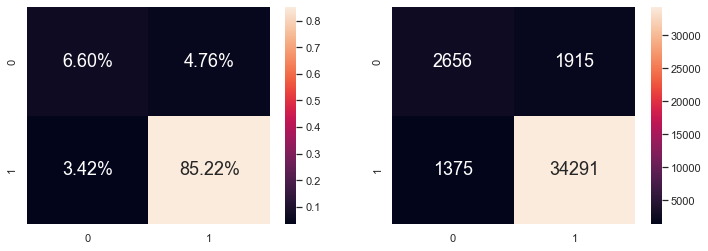

In [29]:
#View CONFUSION matrix
#In percentages and in numbers.

c = confusion_matrix(y_test,y_pred_test)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(c/np.sum(c),  annot = True, annot_kws={"size": 18} ,fmt='.2%',ax=axes[0])
sb.heatmap(c,  annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print(classification_report(y_test, y_pred_test))


### Comparing Between Random Forest And Decision Tree 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8920383234128217

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8920893704799066



<AxesSubplot:>

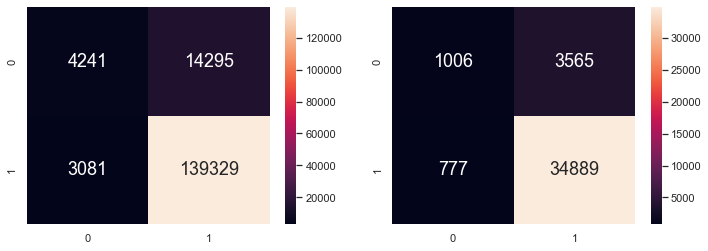

In [30]:
# Recall the Legendary-Total Dataset
X = df[feature].fillna(0) # Assign chosen features to X.
y = df.success


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model


y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#### Fine Tuning Using Gini Importance

Text(0, 0.5, 'Gini Importance')

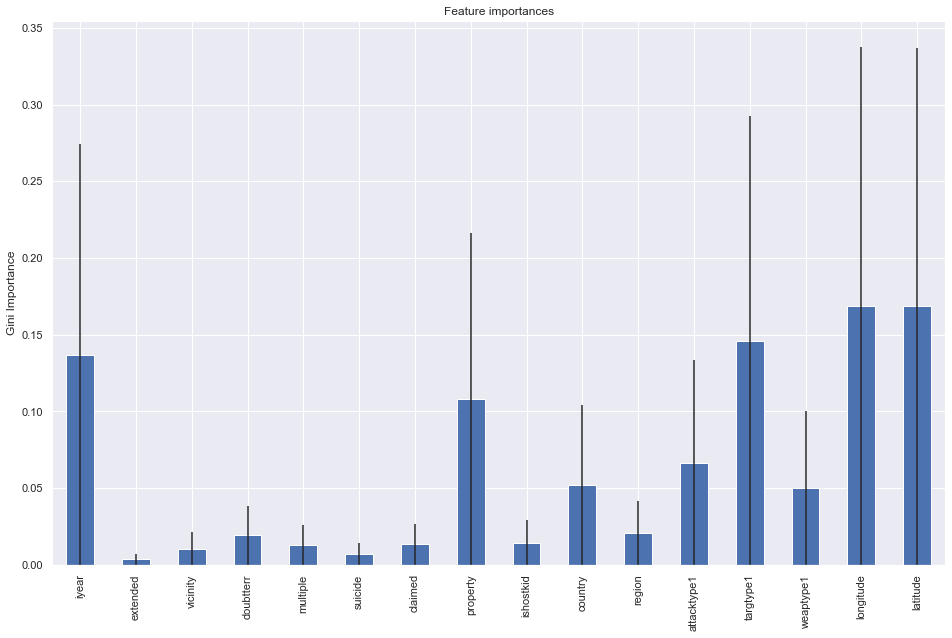

In [31]:
#Fine tuning, Checking the IMPORTANCE OF EACH feature
important_features = model.feature_importances_
forest_importances = pd.Series(important_features, index=feature)
fig, ax = plt.subplots(figsize=(16,10))
forest_importances.plot.bar(yerr=important_features, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Gini Importance")
#The higher the value, the more important the feature

#### Here we attempt to further optimise accuracy of our model by omitting less-important features (with respect to Gini importance)

0.9129656783557423


<AxesSubplot:>

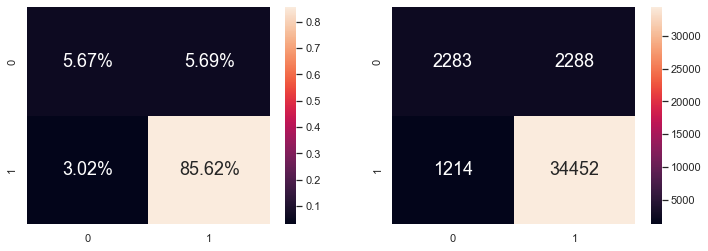

In [32]:
#This shows the importancce of each features in predicting Success.
#We scrap
feature2= ['iyear',
                'property',
                'country',
                'attacktype1',
                'targtype1',
                'weaptype1',
]


X = df[feature2].fillna(0) # Assign chosen features to X.
y = df.success

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


 #Use random forest
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=10)

model.fit(X_train, y_train)

#Accuracy score

y_pred_test = model.predict(X_test)

print(accuracy_score(y_test,y_pred_test))

  
#View CONFUSION matrix
#In percentages and in numbers.

c = confusion_matrix(y_test,y_pred_test)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(c/np.sum(c),  annot = True, annot_kws={"size": 18} ,fmt='.2%',ax=axes[0])
sb.heatmap(c,  annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


### Using our classification model to predict the 2021 terrorism events
How accurately can our model predict them?
#### Here we collect sample data of 2021 terrorist attacks from Wikipedia.org

In [33]:
#LIST OF 2021 ATTACKS, # CAN WE PREDICT THEM?
html_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_terrorist_incidents_in_2021')
html_data
print(len(html_data)) #b)

2


In [34]:
html_data[0]

Date                                       Type  \
0            3 January                                   Stabbing   
1           21 January                            Suicide bombing   
2   24 March – 5 April  Arson, beheadings, looting, mass shooting   
3             28 March                            Suicide bombing   
4              5 April                              Prison escape   
5             21 April                                Car bombing   
6             25 April                                 RPG attack   
7                3 May                       Arson, mass shooting   
8                8 May                                Car bombing   
9               23 May                              Mass shooting   
10          4 – 5 June                              Mass shooting   
11           26 August                            Suicide bombing   
12         3 September                                   Stabbing   
13          15 October                                   Stabbing   
14          20 October                                    Bombing   
15          7 November                               Drone strike   
16         21 November                                   Shooting   
17         25 November                        Suicide car bombing   
18          3 December                       Mass shooting, arson   

              Dead  Injured                           Location  \
0               11        0                    Machh, Pakistan   
1          32 (+2)      110                      Baghdad, Iraq   
2   108+ (+41) [3]  Unknown                  Palma, Mozambique   
3           0 (+2)       20                Makassar, Indonesia   
4                0        0                    Owerri, Nigeria   
5                5       11                   Quetta, Pakistan   
6               31  Unknown                    Mainok, Nigeria   
7               30       20               Kodyel, Burkina Faso   
8               90      240                 Kabul, Afghanistan   
9               18        0           San Miguel del Ene, Peru   
10             174  Unknown  Solhan and Tadaryat, Burkina Faso   
11             183     200+                 Kabul, Afghanistan   
12          0 (+1)        7              Auckland, New Zealand   
13               1        0              Leigh-on-Sea, England   
14              14        3                    Damascus, Syria   
15               0        6                      Baghdad, Iraq   
16          1 (+1)        4                  Jerusalem, Israel   
17               8       17                 Mogadishu, Somalia   
18              31       18                 Mopti Region, Mali   

                                          Article  \
0                                    Machh attack   
1                   January 2021 Baghdad bombings   
2                                 Battle of Palma   
3                 2021 Makassar cathedral bombing   
4                             Owerri prison break   
5                     Quetta Serena Hotel bombing   
6                                   Mainok attack   
7                                   Kodyel attack   
8                       2021 Kabul school bombing   
9                       San Miguel del Ene attack   
10                  Solhan and Tadaryat massacres   
11                      2021 Kabul airport attack   
12               2021 Auckland Countdown stabbing   
13                          Murder of David Amess   
14                      2021 Damascus bus bombing   
15  Attempted assassination of Mustafa Al-Kadhimi   
16                        2021 Jerusalem shooting   
17                November 2021 Mogadishu bombing   
18                             Mopti bus massacre   

                                              Details  \
0   The Islamic State claimed responsibility for k...   
1   Two suicide bombers attacked an open-air marke...   
2   A large group of Islamist insurgents overran P...   
3   Two suspected suicide b

In [35]:
data2021 = pd.read_excel("2021terrorattacks.xlsx")
data2021

iyear  property  country  attacktype1  targtype1  weaptype1
0    2021         0      153            2          1          9
1    2021         1       95            3         14          6
2    2021         1      137            2         14          5
3    2021         1       93            3         15          6
4    2021         1      147            3          2          6
5    2021         1      153            3         14          6
6    2021         1      147            3          4          6
7    2021         1      147            7         14          8
8    2021         1        4            3          8          6
9    2021         0      159            2         14          5
10   2021         0      147            2         14          5
11   2021         1        4            3          6          6
12   2021         0      144            2         14          9
13   2021         1      200            3          4          6
14   2021         0       95            1          2          5
15   2021         0       97            2         14          5
16   2021         1        2            3          8          6
17   2021         1      123            2         14          5

In [36]:
predicted = model.predict(data2021)

results= pd.DataFrame(predicted,columns = ["Predicted_Terrorism"])

summary = pd.concat([data2021,results],axis=1)
summary

iyear  property  country  attacktype1  targtype1  weaptype1  \
0    2021         0      153            2          1          9   
1    2021         1       95            3         14          6   
2    2021         1      137            2         14          5   
3    2021         1       93            3         15          6   
4    2021         1      147            3          2          6   
5    2021         1      153            3         14          6   
6    2021         1      147            3          4          6   
7    2021         1      147            7         14          8   
8    2021         1        4            3          8          6   
9    2021         0      159            2         14          5   
10   2021         0      147            2         14          5   
11   2021         1        4            3          6          6   
12   2021         0      144            2         14          9   
13   2021         1      200            3          4          6   
14   2021         0       95            1          2          5   
15   2021         0       97            2         14          5   
16   2021         1        2            3          8          6   
17   2021         1      123            2         14          5   

    Predicted_Terrorism  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
5                     1  
6                     1  
7                     1  
8                     1  
9                     1  
10                    1  
11                    1  
12                    1  
13                    1  
14                    1  
15                    1  
16                    1  
17                    1

Here we witness a **100% hit rate**, as our model managed to accurately predict **all 18 terrorism acts in 2021** (as per on Wikipedia) as successful 

### Using our classification model to predict success of future terrorist attacks in 2022
In order to predict future events, we need to generate a set of synthetic data first. Here we use `Linear Regression` and `Bayesian Network` to do the respective predictions
#### We use the year to predict terrorism count. We create a new dataframe, `lin`, that stores the year and corresponding terrorism count. Then we use `year` to predict `count`

In [37]:
##Linear regression Model:
#Use year to, predict Terrorism count.
#Create new DF, Year count and terrorism
from sklearn.linear_model import LinearRegression
da = pd.value_counts(df['iyear'])
lin = pd.DataFrame(da)
#Reset so the index will now be a column
lin.reset_index(inplace=True)
lin=lin.rename(columns={'index':'year','iyear':'count'})
lin

year  count
0   2014  16959
1   2015  15133
2   2016  14046
3   2013  12045
4   2017  11358
5   2018   9840
6   2012   8521
7   2019   8495
8   2011   5076
9   1992   5071
10  2010   4826
11  2008   4801
12  2009   4722
13  1991   4683
14  1989   4324
15  1990   3886
16  1988   3720
17  1984   3495
18  1994   3456
19  2007   3247
20  1997   3198
21  1987   3183
22  1995   3081
23  1996   3058
24  1985   2914
25  1983   2870
26  1986   2860
27  2006   2757
28  1979   2662
29  1980   2661
30  1981   2586
31  1982   2543
32  2005   2017
33  2001   1912
34  2000   1823
35  1978   1526
36  1999   1396
37  2002   1330
38  1977   1319
39  2003   1278
40  2004   1164
41  1998    934
42  1976    923
43  1975    740
44  1970    651
45  1974    581
46  1972    568
47  1973    473
48  1971    471

#### Train Linear Regression Model using the Train set
#### Use `lin_year` as *Predictor* and `lin_count` as *Response*.

In [38]:
# Split the Dataset into Train and Test
lin_year = pd.DataFrame(lin['year'])
lin_count = pd.DataFrame(lin['count'])

X_train, X_test, y_train, y_test = train_test_split(lin_year,lin_count, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

#Using Our linear regression model to predict 2022.
d = {'year':[2022]}
predict= pd.DataFrame(d);
predicted_count = linreg.predict(predict)
pc=predicted_count[0][0]
pc = int(pc)
print(pc)
#Predicted count = 9768




# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

9028
Intercept 	: b =  [-363002.85762452]
Coefficients 	: a =  [[183.99168661]]


#### Plot the regression line by prediction using the model

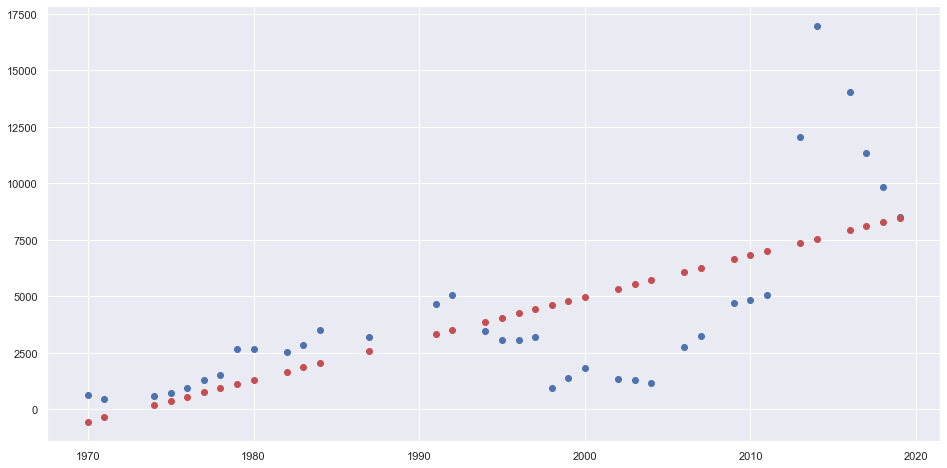

In [39]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
# Predict Total values corresponding to HP Train
y_train_pred = linreg.predict(X_train)

# Plot the Linear Regression line based on the model
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()

#### Goodness of Fit of the Model on TRAIN Set

In [40]:
#goodness of fit of model ON TRAIN SET.

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(X_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))


Explained Variance (R^2) 	: 0.4701972881301041
Mean Squared Error (MSE) 	: 11786940.35163518
Root Mean Squared Error (RMSE) 	: 3433.211375903788


#### Test the Linear Regression model `linreg` using the Test Set

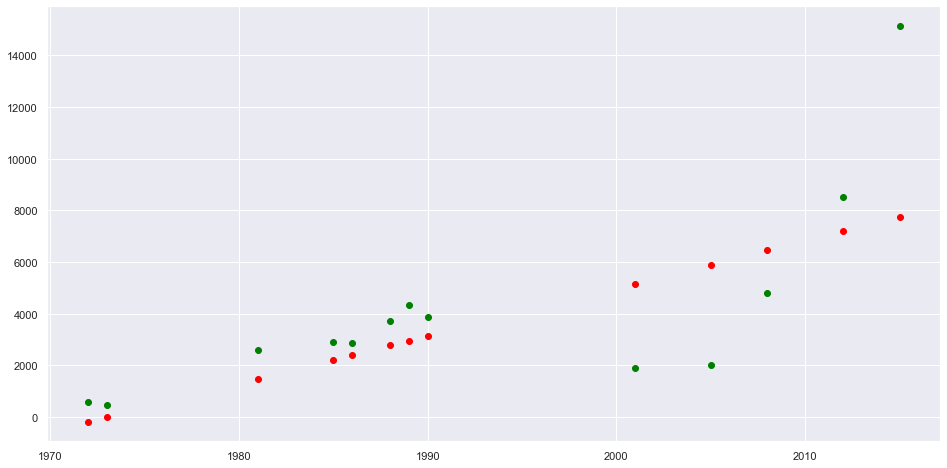

In [41]:
#Goodness of fit of model on TEST Set.
# Predict Total count corresponding to year_Test
y_test_pred = linreg.predict(X_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Check how good the predictions are on the Test Set    
#### **Metrics :** Explained Variance and Mean Squared Error

In [42]:
# Explained Variance (R^2) ON TEST DATA
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5010749556718019
Mean Squared Error (MSE) 	: 6984322.471011743
Root Mean Squared Error (RMSE) 	: 2642.786875821004


### We use Linear Regression model to predict count of terrorist attacks in 2022, and store it as `pc`

In [43]:
#Using Our linear regression model to predict 2022.
d = {'year':[2022]}
predict= pd.DataFrame(d);
predicted_count = linreg.predict(predict)
pc=predicted_count[0][0]
pc = int(pc)
print(pc)
#Predicted count = 9768

9028


In [44]:
# input dataset
input_data = 'terrorismdb.csv'
# location of two output files
mode = 'correlated_attribute_mode'
description_file = f'description.json'
synthetic_data = f'sythetic_data.csv'

### Here we use Bayesian Network to generate a synthetic dataset representing 2022's data 

In [45]:
# An attribute is categorical if its domain size is less than this threshold.
# Here modify the threshold to adapt to the domain size of "education" (which is 14 in input dataset).
threshold_value = 20

# specify categorical attributes
categorical_attributes = {'country': True, 'attacktype1':True,'targtype1':True,'weaptype1':True,'property':True}

# A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not 
# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
epsilon = 1

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 2

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = pc #We use OUR PREDICTED VALUE OF 2022, FROM OUR LINREG MODEL

In [46]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon, 
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_is_categorical=categorical_attributes)
describer.save_dataset_description_to_file(description_file)

================ Constructing Bayesian Network (BN) ================
Adding ROOT attacktype1
Adding attribute weaptype1
Adding attribute country
Adding attribute iyear
Adding attribute targtype1
Adding attribute property
========================== BN constructed ==========================


In [47]:
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

#### After saving the synthetically-generated dataset, we then read both datasets to verify that they are similar 

In [48]:
# Read both datasets using Pandas.
input_df = pd.read_csv(input_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data)
# Read attribute description from the dataset description file.
attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)

#### Comparing Histograms (Left-hand side is Real data, Right-hand side is Synthetic)

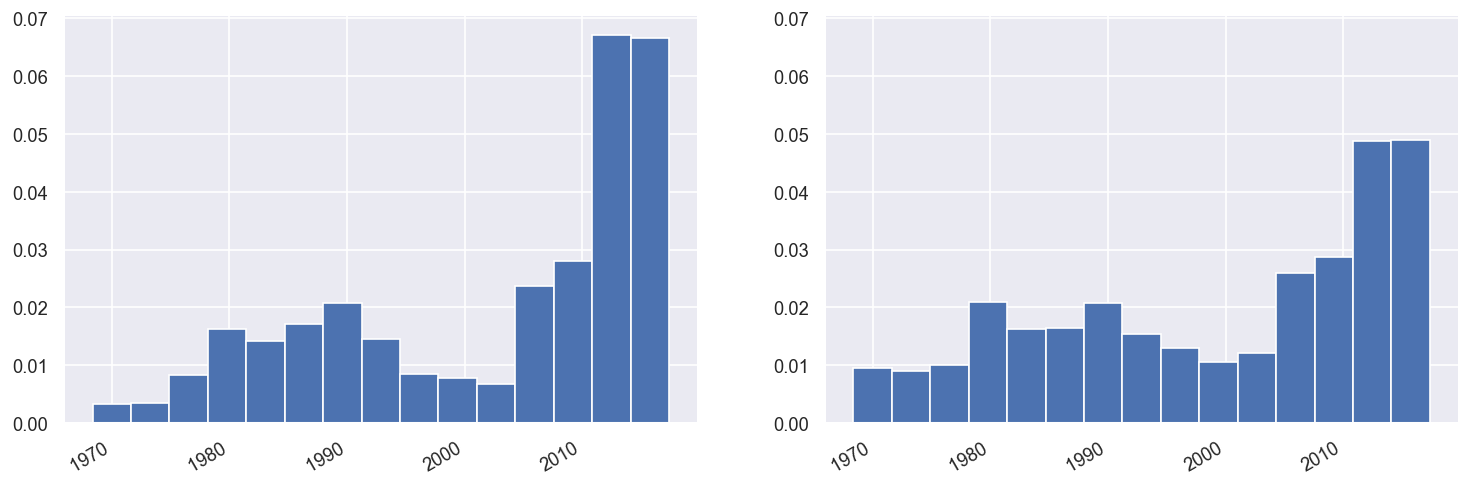

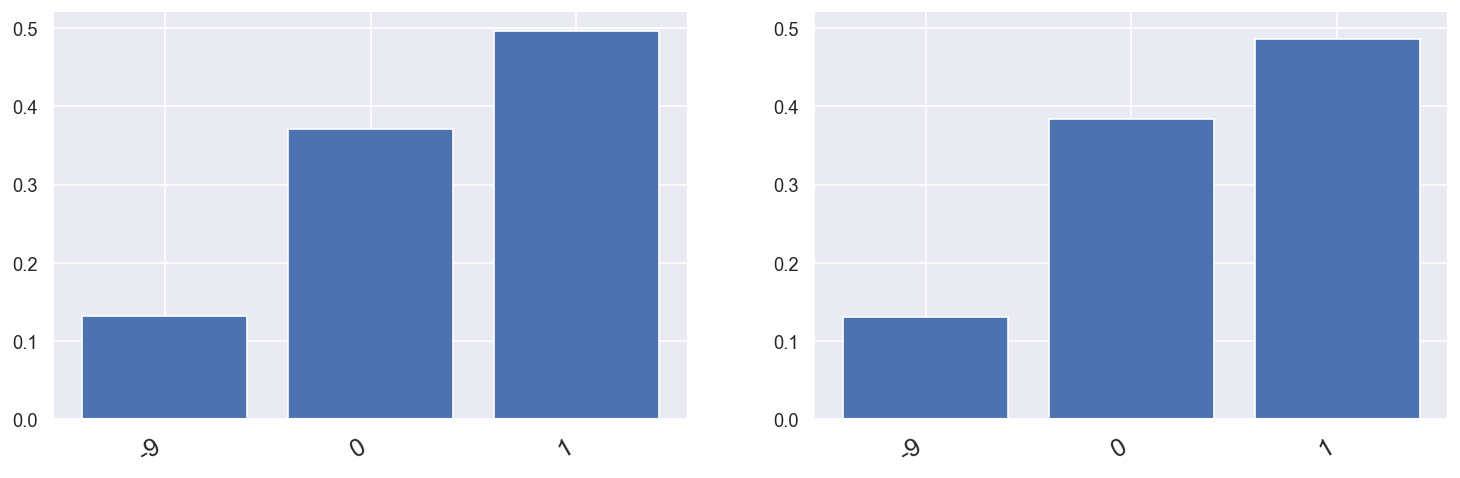

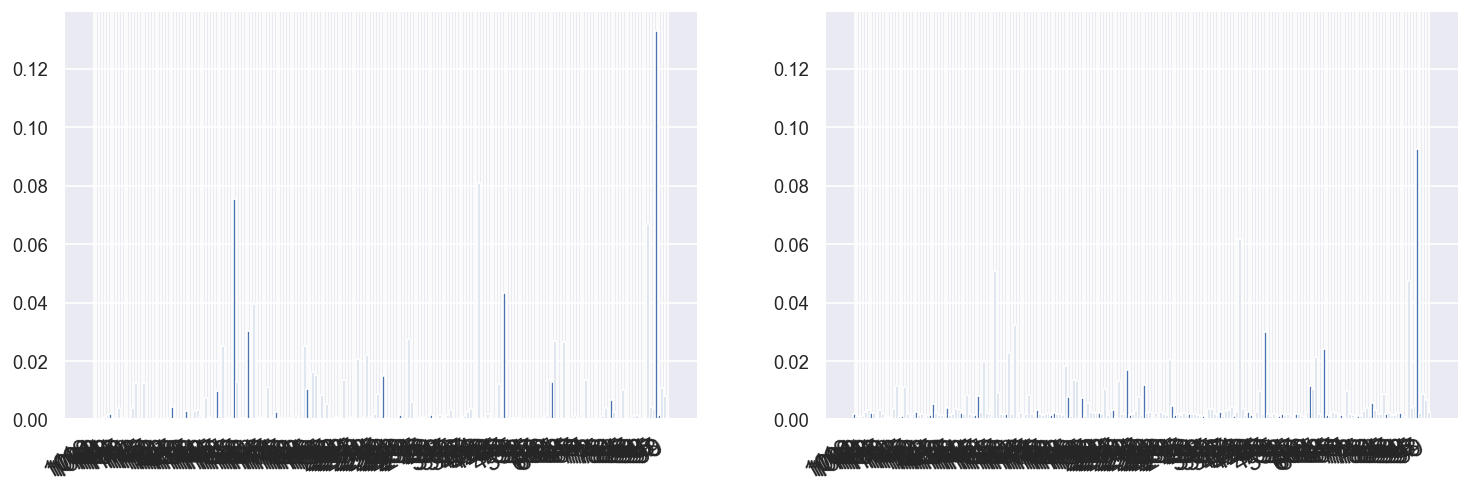

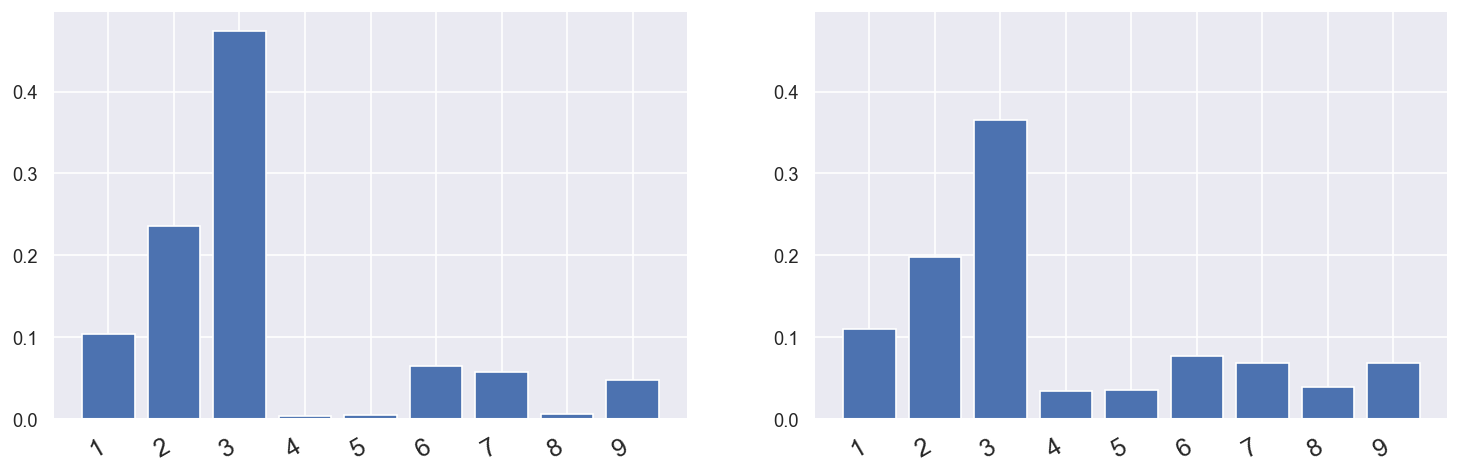

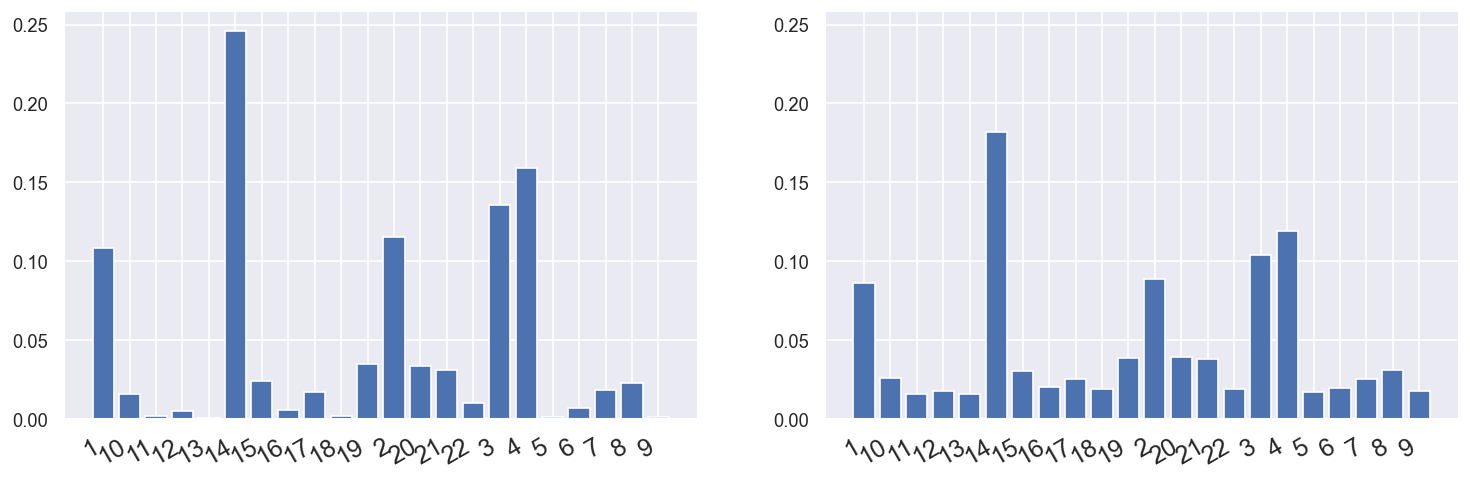

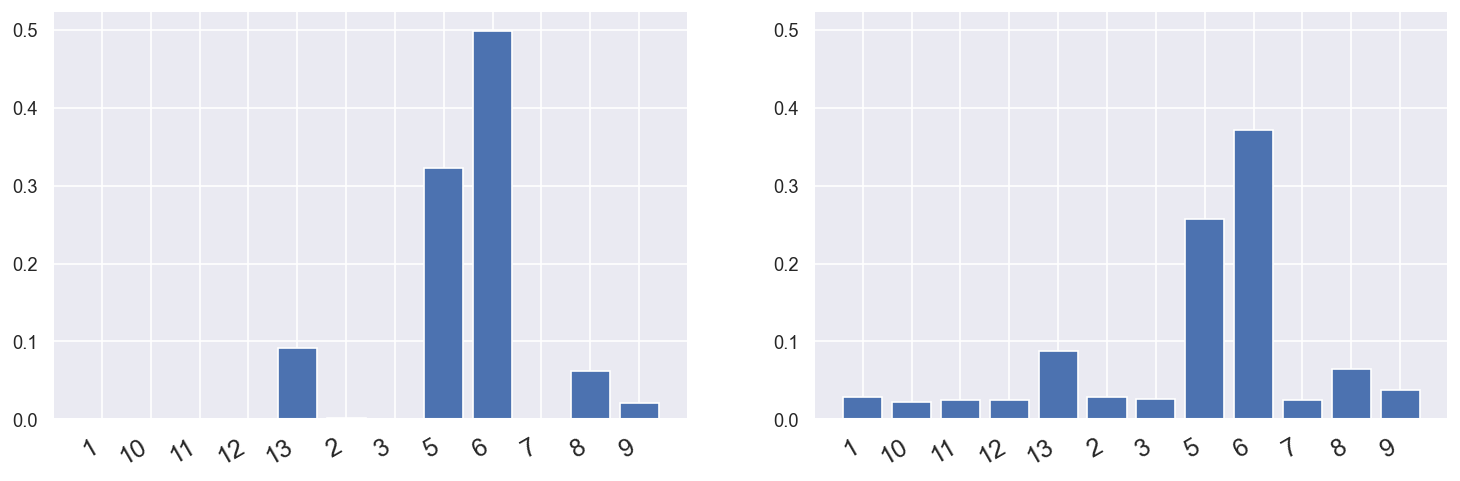

In [49]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)

Here we note that for each column field, the general distribution of values across the bins is similar between the **real data** and the **synthesized data**. This shows that our synthetic dataset is similar in nature to past real-life data and we can go ahead and use it to predict using our model.

#### Comparing Heatmaps

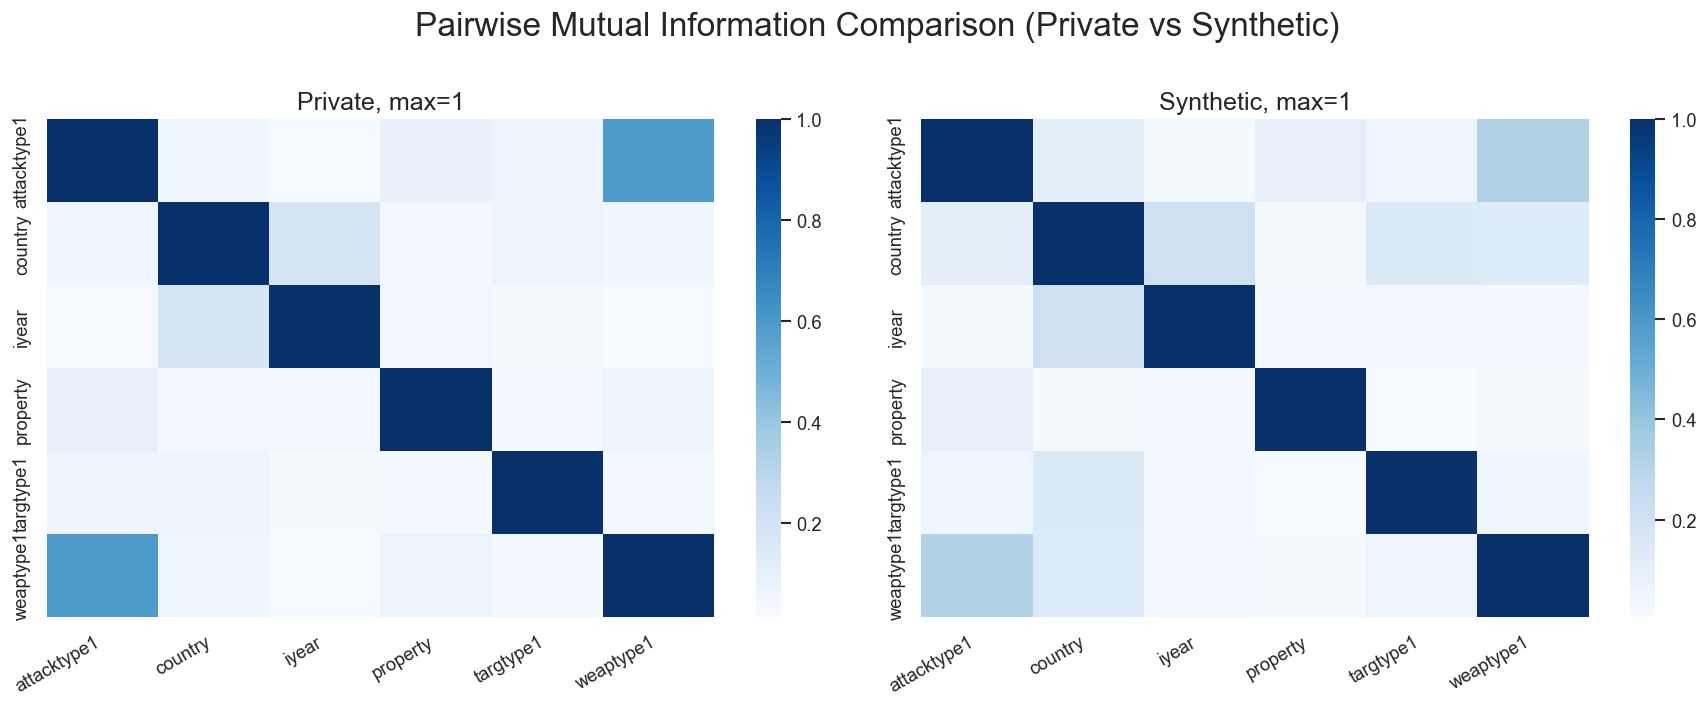

In [50]:
inspector.mutual_information_heatmap()

Here we note that the respective correlations among the six variables are generally similar across both the real data (**Private**) and the newly-predicted data (**Synthetic**)

#### We read our synthesised data into a dataframe, `syndata`, to carry out our final prediction

In [51]:
syndata = pd.read_csv('sythetic_data.csv')
syndata['iyear']=2022 #set all year to 2022
syndata.property=np.where(syndata['property']<0,0,1)
syndata

iyear  property  country  attacktype1  targtype1  weaptype1
0      2022         1      159            3          2          6
1      2022         1       67            5          6          1
2      2022         1       88            3         13          6
3      2022         1       45            3          4          6
4      2022         0     1003            3         11          6
...     ...       ...      ...          ...        ...        ...
9023   2022         0       63            9         10          5
9024   2022         1        6            2         12          5
9025   2022         1       20            2          6          5
9026   2022         1      146            9         12          9
9027   2022         0      128            1         15         12

[9028 rows x 6 columns]

### Use RandomForestClassifier model to predict success of terrorist events based on synthetic dataset

In [52]:
#Use our classification Model to predict successful attacks of the generated dataset
predicted = model.predict(syndata)

results= pd.DataFrame(predicted,columns = ["Predicted_Terrorism"])

summary = pd.concat([syndata,results],axis=1)
summary


iyear  property  country  attacktype1  targtype1  weaptype1  \
0      2022         1      159            3          2          6   
1      2022         1       67            5          6          1   
2      2022         1       88            3         13          6   
3      2022         1       45            3          4          6   
4      2022         0     1003            3         11          6   
...     ...       ...      ...          ...        ...        ...   
9023   2022         0       63            9         10          5   
9024   2022         1        6            2         12          5   
9025   2022         1       20            2          6          5   
9026   2022         1      146            9         12          9   
9027   2022         0      128            1         15         12   

      Predicted_Terrorism  
0                       1  
1                       1  
2                       1  
3                       1  
4                       0  
...                   ...  
9023                    1  
9024                    1  
9025                    1  
9026                    1  
9027                    1  

[9028 rows x 7 columns]

Above, `Predicted_Terrorism` refers to whether or not a terrorist attack is successful 

1 --> **successful**

0 --> **unsuccessful**

In [53]:
summary.describe()

iyear     property      country  attacktype1    targtype1  \
count  9028.0  9028.000000  9028.000000  9028.000000  9028.000000   
mean   2022.0     0.869739   139.568786     3.806934     9.566903   
std       0.0     0.336609   131.215640     2.328854     6.678078   
min    2022.0     0.000000     4.000000     1.000000     1.000000   
25%    2022.0     1.000000    69.000000     2.000000     3.000000   
50%    2022.0     1.000000   113.000000     3.000000     9.000000   
75%    2022.0     1.000000   180.000000     6.000000    14.000000   
max    2022.0     1.000000  1004.000000     9.000000    22.000000   

         weaptype1  Predicted_Terrorism  
count  9028.000000          9028.000000  
mean      6.653522             0.916704  
std       2.836879             0.276345  
min       1.000000             0.000000  
25%       5.000000             1.000000  
50%       6.000000             1.000000  
75%       8.000000             1.000000  
max      13.000000             1.000000

In [54]:
y.describe()

count    201183.000000
mean          0.885144
std           0.318848
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: success, dtype: float64

In [55]:
print("Country \n",cntry)
print("\n Weapon type \n",weapx)
print("\n Attack type \n",atk)
print("\n Target type \n",targ)

Country 
 {58: 'Dominican Republic', 130: 'Mexico', 160: 'Philippines', 78: 'Greece', 101: 'Japan', 217: 'United States', 218: 'Uruguay', 98: 'Italy', 499: 'East Germany (GDR)', 65: 'Ethiopia', 83: 'Guatemala', 222: 'Venezuela', 362: 'West Germany (FRG)', 199: 'Switzerland', 102: 'Jordan', 185: 'Spain', 30: 'Brazil', 60: 'Egypt', 11: 'Argentina', 110: 'Lebanon', 96: 'Ireland', 209: 'Turkey', 158: 'Paraguay', 94: 'Iran', 603: 'United Kingdom', 45: 'Colombia', 26: 'Bolivia', 145: 'Nicaragua', 142: 'Netherlands', 21: 'Belgium', 38: 'Canada', 14: 'Australia', 153: 'Pakistan', 230: 'Zambia', 198: 'Sweden', 49: 'Costa Rica', 406: 'South Yemen', 36: 'Cambodia', 97: 'Israel', 161: 'Poland', 201: 'Taiwan', 156: 'Panama', 106: 'Kuwait', 155: 'West Bank and Gaza Strip', 15: 'Austria', 236: 'Czechoslovakia', 92: 'India', 69: 'France', 428: 'South Vietnam', 31: 'Brunei', 604: 'Zaire', 605: "People's Republic of the Congo", 162: 'Portugal', 6: 'Algeria', 61: 'El Salvador', 205: 'Thailand', 87: 'Hait

In [56]:
newdf = summary.replace({"country":cntry})
newdf

iyear  property     country  attacktype1  targtype1  weaptype1  \
0      2022         1        Peru            3          2          6   
1      2022         1        Fiji            5          6          1   
2      2022         1    Honduras            3         13          6   
3      2022         1    Colombia            3          4          6   
4      2022         0      Kosovo            3         11          6   
...     ...       ...         ...          ...        ...        ...   
9023   2022         0     Eritrea            9         10          5   
9024   2022         1     Algeria            2         12          5   
9025   2022         1    Barbados            2          6          5   
9026   2022         1       Niger            9         12          9   
9027   2022         0  Mauritania            1         15         12   

      Predicted_Terrorism  
0                       1  
1                       1  
2                       1  
3                       1  
4                       0  
...                   ...  
9023                    1  
9024                    1  
9025                    1  
9026                    1  
9027                    1  

[9028 rows x 7 columns]

### Information Presentation
How can we better visualise our prediction findings?

In [57]:
#Setting up the world countries data URL
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'
#Getting the amount of successful terrorism count per country

#Drop cells with predicted_terrorism 0
clean=newdf.drop(newdf[newdf.Predicted_Terrorism ==0].index)
a=clean["country"].value_counts()
adf= pd.DataFrame(a)
#Reset so the index will now be a column
adf.reset_index(inplace=True)
#Now rename the columns
adf=adf.rename(columns={'index':'country','country':'count'})
print(adf.head(n=10).to_string(index=False))


    country  count
       Iraq    779
Afghanistan    535
   Pakistan    423
      India    370
Philippines    275
   Colombia    236
El Salvador    203
       Peru    189
    Nigeria    168
      Yemen    163


## Interactive Chloropleth map showing distribution of predicted attacks

In [58]:
m=folium.Map()
folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='Predicted Terrorism events in 2022',
    data=adf,
    #The column accepting list with 2 value; The country name and  the numerical value
    columns=['country','count'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    nan_fill_color='white'
).add_to(m)
m

## Statistical Inference

 ---
Based on the above Chloropleth map, we note that:
1) Countries such as `Iraq` are under --> **High Risk** of successfully being attacked

2) ``Afghanistan``, ``Pakistan`` are under --> **Moderate to High Risk**

3) ``Colombia``, ``Peru``, `Salvador`, ``Nigeria``, ``Somalia``, ``Yemen``, ``Turkey``, ``India``, ``Thailand``, ``Philippines`` are under --> **Moderate Risk**

4) Others --> **Relatively Low Risk**

## Ethical Consideration

 ---
While our model can be of great use to national security teams of the above countries as they prepare to monitor future threats, we must also take into consideration that such information can easily fall into the wrong hands. If future terrorists get their hands on such prediction insights it will make it easier for them to 'escape the radar', which leads to more damage in the long run.

Governments may benefit from using this prediction model as part of their arsenal of anti-terrorism measures, but never in place of it - nothing can replace the human intuition of deciding whether to heed or ignore a terrorism warning report.

## Intelligent Decision

 ---
**Recommendations:** Having taken care of the ethical considerations, our data-driven insights are as follows:

**1)** With the map as a reference, countries that not only fall within the moderate- to high-risk categories, but also countries that share borders with these nations (e.g. Iran, Syria, Oman) need to ramp up their monitoring regimes. Although this prediction is not definitive and fails to account for 2020's drop in terrorist activity, it can give good insight as to what terrorists' next move(s) could be. 

**2)** Instead of standalone terrorism success-predictor, this intelligence advisor can be used to supplement existing intelligence strategies for security teams. They can use them as tools to delegate the available resources for surveillance and defence as and when needed. Prevention is always better - governments can additionally choose to monitor the levels of terrorist recruitment taking place in their respective countries. This data can further add value to future anti-terrorist campaigns.

**3)** With the advent of new technologies and the Covid-19 Pandemic, the world has seen a rise in terrorist activity as a direct result of the Internet and online resources. Therefore, a prediction model that predicts future activities by region based on a population's online activity (E.g. by monitoring Google search history) could be a possibility although question marks over privacy exist. Nevertheless it is important to develop different dimensions in order to protect oneself on all fronts from potential terrorism